# Proceso de vacunación en las CCAA de España
El Ministerio de Sanidad publica desde inicio de enero 2021, casi diariamente en su [página sobre estrategia de vacunación COVID-19 en España](https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/vacunaCovid19.htm) los datos de avances de vacunación en todas las comunidades autónomas. 
En el fichero `vacunacion.csv` disponible en el Aula Virtual, podéis encontrar la recopilación de los datos de todos los ficheros disponibles desde el inicio de enero hasta la fecha de última actualización de este trabajo.

Importad los módulos necesarios, definir `DATA_DIRECTORY` y cargar los datos en un DataFrame llamado `vacunacion`. 

In [1]:
# Completar aquí

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

DATA_DIRECTORY = path.join('..', 'data')

vacunacion = pd.read_csv(
    path.join(DATA_DIRECTORY,  'vacunacion.csv'),
    sep=',',
    parse_dates= ['Fecha de la última vacuna registrada (2)'],
)

poblacion_ccaa = pd.read_csv(
    path.join(DATA_DIRECTORY, 'poblacion_ccaa.csv'),
    sep = ';',
    skiprows= 2,
    encoding='utf8',
    skip_blank_lines = True,
    thousands = '.'
)

# --------------------
vacunacion

,comunidad,Dosis entregadas Pfizer (1),Dosis entregadas Moderna (1),Dosis entregadas AstraZeneca (1),Total Dosis entregadas (1),Dosis administradas (2),% sobre entregadas,Nº Personas vacunadas(pauta completada),Fecha de la última vacuna registrada (2)
0,Andalucía,140295,0,0,140295,25809,0.183962,0,2021-01-03
1,Aragón,23715,0,0,23715,2004,0.084503,0,2021-01-02
2,Asturias,23720,0,0,23720,9380,0.395447,0,2021-01-03
3,Baleares,8940,0,0,8940,153,0.017114,0,2020-12-28
4,Canarias,20835,0,0,20835,4846,0.524502,0,2021-01-03
...,...,...,...,...,...,...,...,...,...
975,Navarra,76785,9700,26800,113285,90919,0.802569,29319,2021-03-17
976,País Vasco,238500,30800,90200,359500,254750,0.708623,69823,2021-03-17
977,Ceuta,5490,900,3500,9890,9424,0.952882,2541,2021-03-17
978,Melilla,4320,800,3500,8620,7915,0.918213,2379,2021-03-17


Comprobamos que no hay datos faltantes 

In [12]:
# Completar aquí
vacunacion.isna().sum()
# --------------------


comunidad                                   0
Dosis entregadas Pfizer (1)                 0
Dosis entregadas Moderna (1)                0
Dosis entregadas AstraZeneca (1)            0
Total Dosis entregadas (1)                  0
Dosis administradas (2)                     0
% sobre entregadas                          0
Nº Personas vacunadas(pauta completada)     0
Fecha de la última vacuna registrada (2)    0
dtype: int64

Ordenamos el DataFrame según la Fecha de la última vacuna registrada.


In [13]:
# Completar aquí

vacunacion.sort_values(['Fecha de la última vacuna registrada (2)'], inplace= True)

# --------------------
vacunacion['Fecha de la última vacuna registrada (2)'].unique()

array(['2020-12-28T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-06T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23T00:00:00.000000000',
       '2021-01-24T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
       '2021-01-26T00:00:00.000000000', '2021-01-27

## Evolución del porcentaje de dosis administradas respecto a las entregadas

Empezamos por escoger todos los datos correspondientes a la CARM que recogemos en un  `DataFrame` llamado `vacunacion_murcia`.

In [14]:
# Completar aquí
vacunacion_murcia = vacunacion[vacunacion['comunidad'].isin(['Murcia'])]
# --------------------
vacunacion_murcia

,comunidad,Dosis entregadas Pfizer (1),Dosis entregadas Moderna (1),Dosis entregadas AstraZeneca (1),Total Dosis entregadas (1),Dosis administradas (2),% sobre entregadas,Nº Personas vacunadas(pauta completada),Fecha de la última vacuna registrada (2)
14,Murcia,25685,0,0,25685,442,0.017208,0,2021-01-04
34,Murcia,25685,0,0,25685,7287,0.283706,0,2021-01-07
54,Murcia,25685,0,0,25685,8958,0.348764,0,2021-01-08
74,Murcia,25685,0,0,25685,16191,0.630368,0,2021-01-12
94,Murcia,38360,1200,0,39560,21739,0.549520,0,2021-01-14
114,Murcia,38360,1200,0,39560,27001,0.682533,0,2021-01-15
134,Murcia,38360,1200,0,39560,34103,0.862058,0,2021-01-18
154,Murcia,38360,1200,0,39560,36730,0.928463,934,2021-01-19
174,Murcia,45185,1200,0,46385,39142,0.843850,1522,2021-01-20
194,Murcia,45185,1200,0,46385,40757,0.878668,1784,2021-01-21


Hacemos una primera representación gráfica para el caso de la CARM, usando una función step (constante por trozos)

(array([18628., 18642., 18659., 18673., 18687., 18701.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

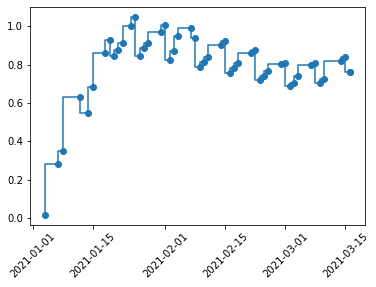

In [15]:
# Completar aquí
plt.step(vacunacion_murcia['Fecha de la última vacuna registrada (2)'], vacunacion_murcia["% sobre entregadas"],'o-')
plt.xticks(rotation=45)
# --------------------


Ahora pasamos a representar todas las CCAA en la misma gráfica, usando el colormap 'tab20' para distinguir cada una de las comunidades autónomas.

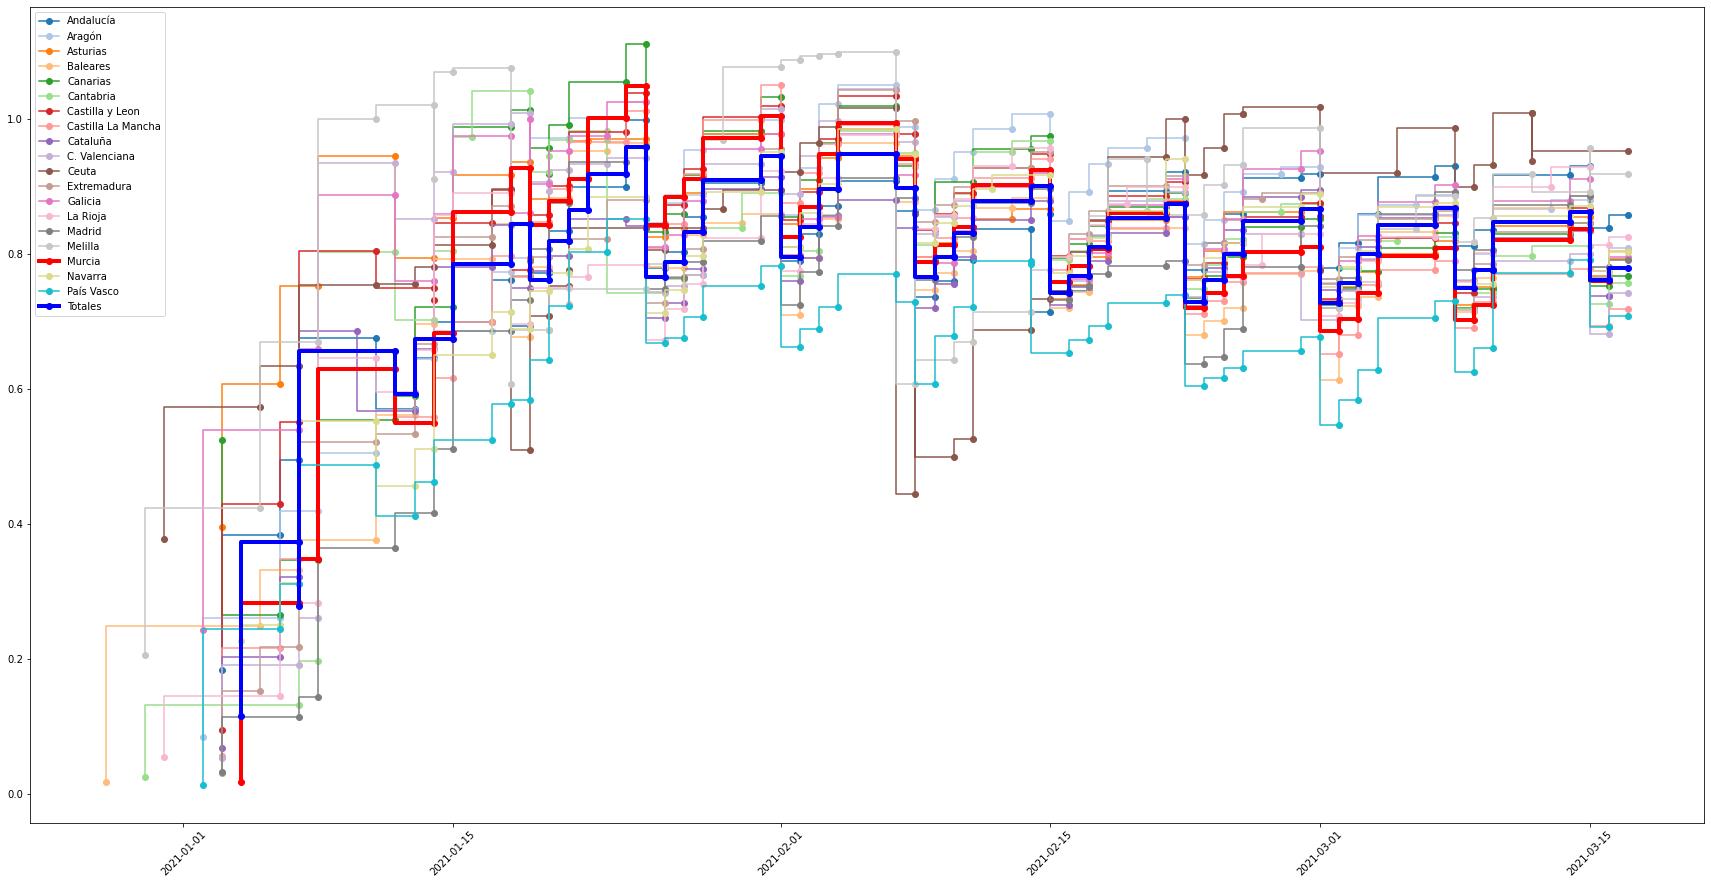

In [16]:
# Completar aquí
comunidades = ['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y Leon', 'Castilla La Mancha', 'Cataluña', 'C. Valenciana', 'Ceuta', 'Extremadura', 'Galicia', 'La Rioja', 'Madrid', 'Melilla', 'Murcia', 'Navarra', 'País Vasco', 'Totales']


plt.figure(figsize=(30,15))

for c in range(20):
    v = vacunacion[vacunacion['comunidad'].isin([comunidades[c]])]
    if(comunidades[c] == 'Totales'):
        plt.step(v['Fecha de la última vacuna registrada (2)'], v["% sobre entregadas"],'o-', label = comunidades[c], color = 'blue', linewidth = 4.0)
    elif(comunidades[c] == 'Murcia'):
        plt.step(v['Fecha de la última vacuna registrada (2)'], v["% sobre entregadas"],'o-', label = comunidades[c], color = 'red', linewidth = 4.0)
    else:
        plt.step(v['Fecha de la última vacuna registrada (2)'], v["% sobre entregadas"],'o-', label = comunidades[c], color = plt.cm.tab20.colors[c%20])

plt.xticks(rotation=45)
plt.legend()
# --------------------

Para distinguir mejor la CARM y los totales, vamos a aumentar su grosor de línea y cambiar su color

In [17]:
# Completar aquí

# --------------------


## Evolución del porcentaje de personas inmunizadas entre la población (Dificultad: ***)
Queremos ahora realizar una gráfica parecidas pero con el porcentaje de personas inmunizadas entre la población de cada comunidad autónoma. Para ello, necesitamos los datos de población, podeís cargarlos del fichero `poblacion_ccaa.csv` del Aula virtual. Tenéis que intentar conseguir reproducir o mejorar la gráfica siguiente:




In [20]:
vacunacion = vacunacion.merge(poblacion_ccaa, how='left', left_on='comunidad', right_on='comunidad')

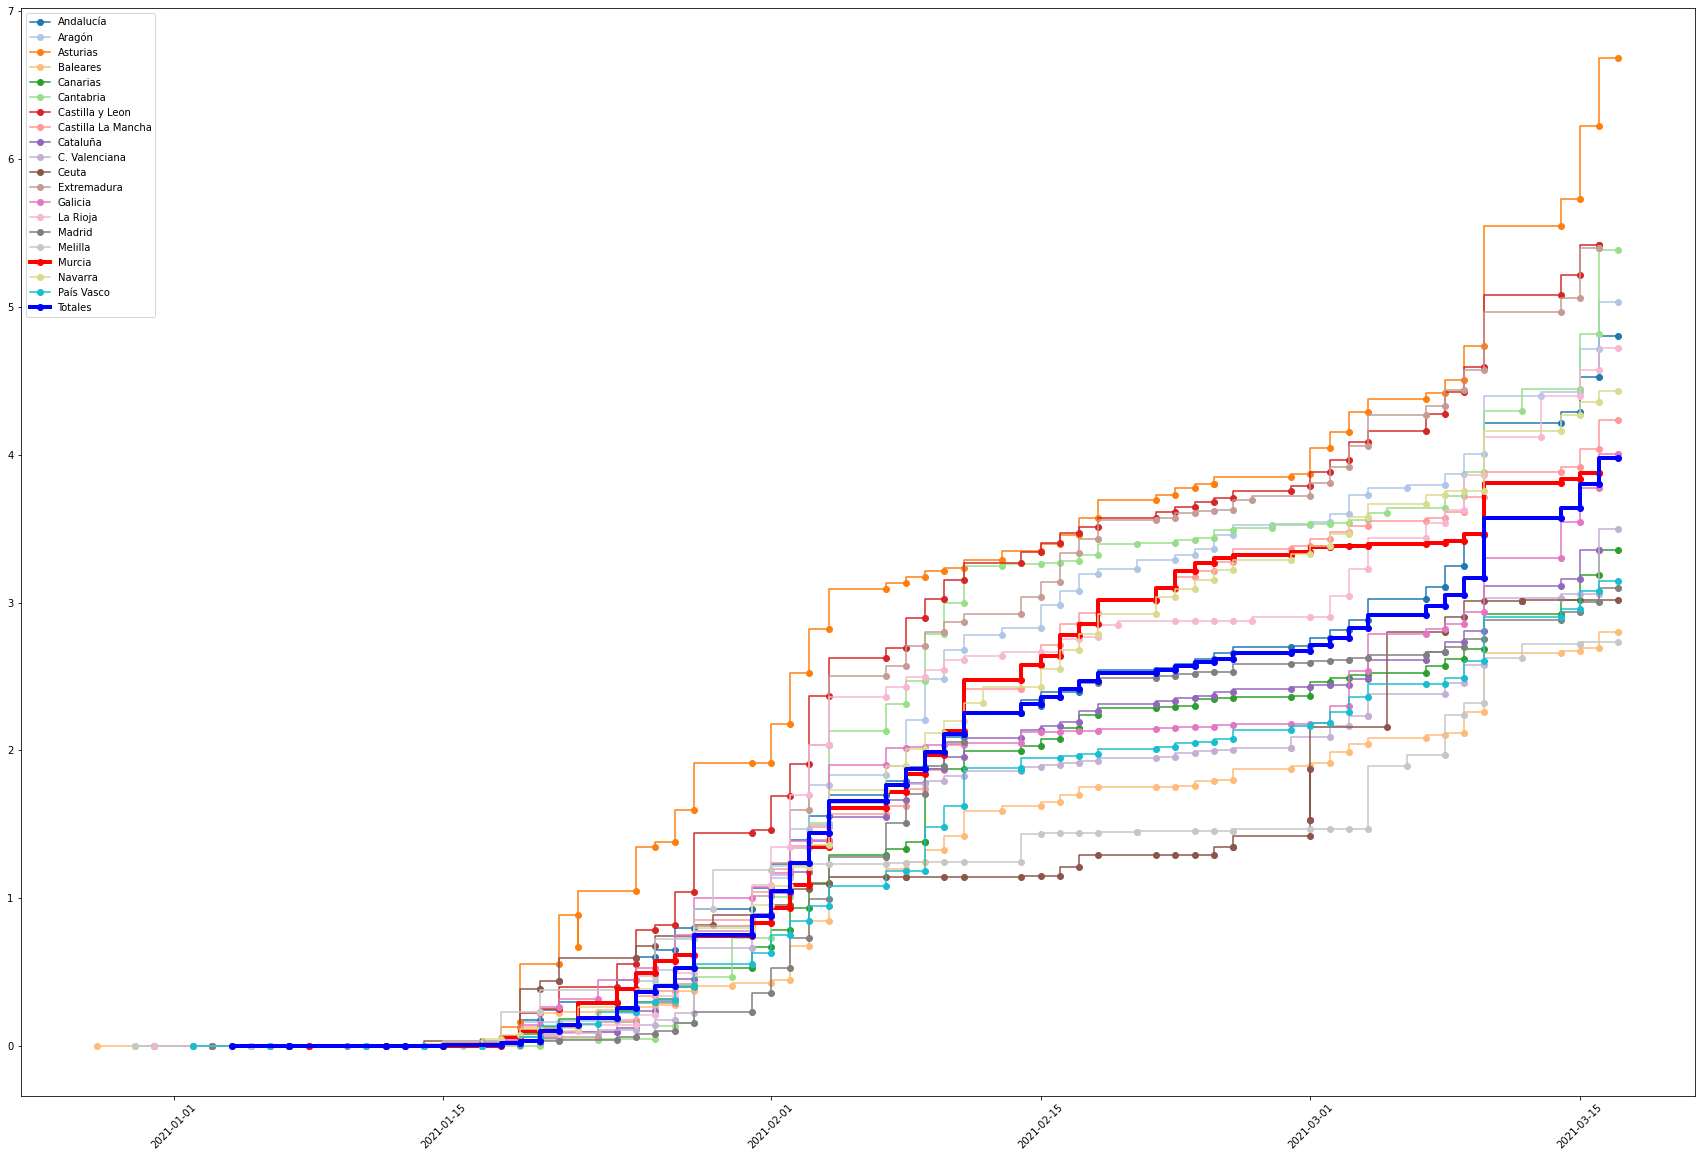

In [21]:
# Completar aquí 
comunidades = ['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y Leon', 'Castilla La Mancha', 'Cataluña', 'C. Valenciana', 'Ceuta', 'Extremadura', 'Galicia', 'La Rioja', 'Madrid', 'Melilla', 'Murcia', 'Navarra', 'País Vasco', 'Totales']


plt.figure(figsize=(30,20))

for c in range(20):
    v = vacunacion[vacunacion['comunidad'].isin([comunidades[c]])]
    percent = v['Nº Personas vacunadas(pauta completada)'] * 100 / v['TotalPoblacion']

    if(comunidades[c] == 'Totales'):
        plt.step(v['Fecha de la última vacuna registrada (2)'], percent,'o-', label = comunidades[c], color = 'blue', linewidth = 4.0)
    elif(comunidades[c] == 'Murcia'):
        plt.step(v['Fecha de la última vacuna registrada (2)'], percent,'o-', label = comunidades[c], color = 'red', linewidth = 4.0)
    else:
        plt.step(v['Fecha de la última vacuna registrada (2)'], percent,'o-', label = comunidades[c], color = plt.cm.tab20.colors[c%20])

plt.xticks(rotation=45)
plt.legend()
# --------------------
